In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [24]:
df=pd.read_csv('./AAPL_2015_to_2020_yahoo_finance.csv')

In [25]:
#Adding data to dates when the stock market is closed
idx = pd.date_range('2015-01-02', '2020-12-31')
df.index = pd.DatetimeIndex(df.Date)
df = df.reindex(idx, method='ffill')
df.drop('Date', axis=1, inplace=True)

In [27]:
#List of dates for the apple events
apple_event_dates_str=["2015-03-09","2015-06-10","2015-09-09",
"2016-03-21","2016-06-15","2016-09-07", "2016-10-27",
"2017-06-07", "2017-09-12",
"2018-03-27","2018-06-06", "2018-09-12", "2018-10-30",
"2019-03-25","2019-06-05","2019-09-10","2019-12-02",
"2020-06-24","2020-09-15","2020-10-13","2020-11-10"]

#apple_event_dates_pd = pd.DataFrame({'Date':[dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]})
apple_event_dates=[dt.datetime.strptime(date, "%Y-%m-%d").date() for date in apple_event_dates_str]

In [28]:
#Adds the Apple event 
ap=df[df.index.isin(apple_event_dates_str)]

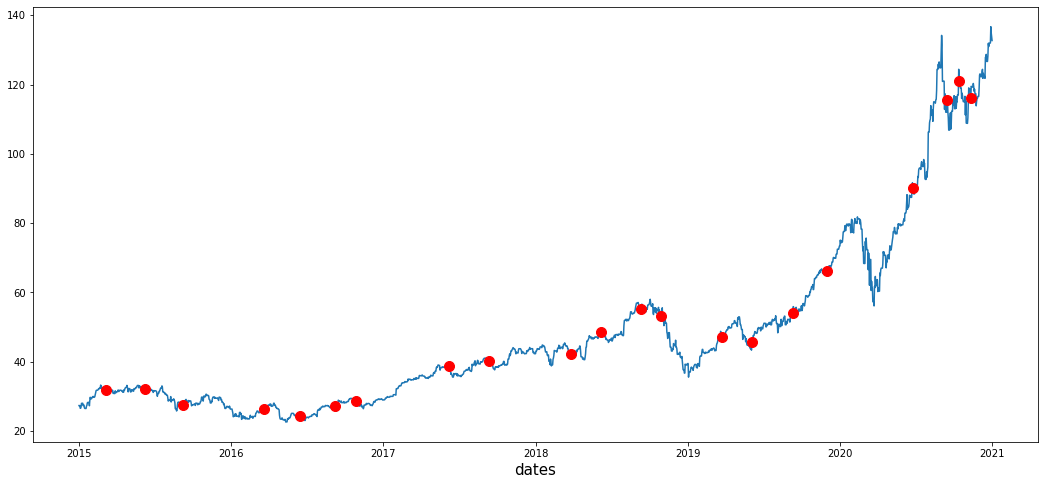

In [30]:
#Plots the dates after adding the 
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(df.index,df.Close)
ax.set_xlabel("dates",size=15)
ax.scatter(ap.index, ap.Close, c="r", s=100, zorder=3)
plt.show()

## Group by week

In [31]:
df_week=pd.read_csv('./AAPL_2015_to_2020_yahoo_finance.csv')

In [32]:
df_week=pd.read_csv('./AAPL_2015_to_2020_yahoo_finance.csv')
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas/45281439
df_week['Date'] = pd.to_datetime(df_week['Date']) - pd.to_timedelta(7, unit='d')
df_week = df_week.groupby([pd.Grouper(key='Date', freq='W-MON')]).mean().reset_index().sort_values('Date')


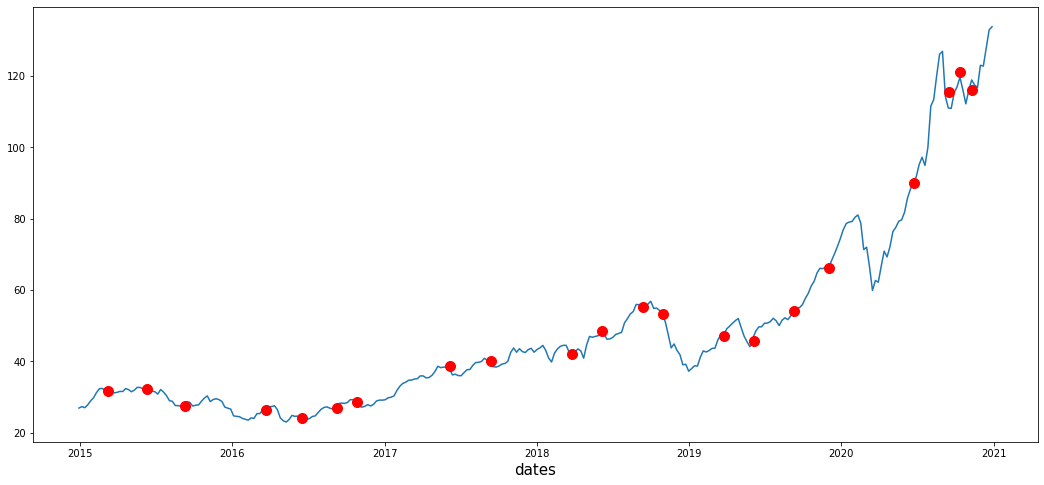

In [36]:
#Plots the dates after adding the 
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(df_week["Date"],df_week["Close"])
ax.set_xlabel("dates",size=15)
ax.scatter(ap.index, ap.Close, c="r", s=100, zorder=3)
plt.show()